In [2]:
import pandas as pd

In [3]:
train_log = pd.read_csv("../data/train_log.csv")
train_label = pd.read_csv("../data/train_label.csv")

test_log = pd.read_csv("../data/test_log.csv")
test_label = pd.read_csv("../data/test_session.csv")

yado = pd.read_csv("../data/yado.csv")

sample_submission = pd.read_csv("../data/sample_submission.csv")

image_embeddings = pd.read_parquet("../data/image_embeddings.parquet")

In [7]:
yado

,yad_no,yad_type,total_room_cnt,wireless_lan_flg,onsen_flg,kd_stn_5min,kd_bch_5min,kd_slp_5min,kd_conv_walk_5min,wid_cd,ken_cd,lrg_cd,sml_cd
0,1,0,129.0,1.0,0,1.0,NaN,NaN,1.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,449c52ef581d5f9ef311189469a0520e,677a32689cd1ad74e867f1fbe43a3e1c
1,2,0,23.0,1.0,0,NaN,NaN,NaN,NaN,d86102dd9c232bade9a97dccad40df48,b4d2fb4e51ea7bca80eb1270aa474a54,5c9a8f48e9df0234da012747a02d4b29,4ee16ee838dd2703cc9a1d5a535f0ced
2,3,0,167.0,1.0,1,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,ab9480fd72a44d51690ab16c4ad4d49c
3,4,0,144.0,1.0,0,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,52c9ea83f2cfe92be54cb6bc961edf21,1cc3e1838bb0fd0fde0396130b1f82b9
4,5,0,41.0,1.0,1,NaN,NaN,NaN,NaN,43875109d1dab93592812c50d18270a7,75617bb07a2785a948ab1958909211f1,9ea5a911019b66ccd42f556c42a2fe2f,be1b876af18afc4deeb3081591d2a910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13801,13802,0,10.0,1.0,1,NaN,NaN,NaN,NaN,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,80fb3c5ad0c89931d0923e9f80885218,5eb30820716082c720836733d73c605e
13802,13803,0,NaN,NaN,0,1.0,NaN,NaN,1.0,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,e5cfcc0a43c82072aca11628ff0add53,20ad8785a30f125bee5a8a325782ab06
13803,13804,0,80.0,1.0,1,NaN,1.0,NaN,1.0,d86102dd9c232bade9a97dccad40df48,7d76599bd27ff9e7823b2b1323ca763e,c5fe8848b6ab39b040cdb3668aea9433,b3eab50ccf6ffb51c37d36ee384abfbf
13804,13805,0,8.0,1.0,1,NaN,NaN,NaN,1.0,3300cf6f774b7c6a5807110f244cbc21,689cf8289e7ea0b2eef1b017dcdfe8de,8b712435430a6875839a6c3b5a40b008,2b4165444a777465576b25f65697d739


In [6]:
yado["ken_cd"].value_counts()

ken_cd
107c7305a74c8dcc4f143de208bf7ec2    1180
0a66f6ab9c0507059da6f22a0e1f1690     914
6920865be128aa14814810654738b159     705
072c85e1653e10c9c7dd065ad007125a     632
94d4f7dc1971d3473e6ed039a323bf4d     570
c86352f5b57e80fe545cfec1fd8505a1     534
ce3aaf25e7e38a0c42d373fb148efc86     432
2b99151dba9558109a35c75a3c05c38b     423
d78f53d0856617bc782f02c3280dfef2     423
bd054cc265d68a400ccb976ac69c6463     412
66c4d01ad8e30155582cf80b1d655986     390
572d60f0f5212aacda515ebf81fb0a3a     383
7bc5fba93082f02f1cc37b7fa264d291     330
013592a15b9a689232792f11da797ac7     322
ce83563814cff3080c8ae076f44b3020     315
06a6febd7478c1aa664ed5ac87f2d560     299
84efa50e52f9b471c95bfc3b21b854ad     298
3acaaea4dab8892b5c9832f1b32f9448     270
223938a74a609968141867c244086206     268
31a0f630d36db568ab23c9c1cd80d1c1     263
b4d2fb4e51ea7bca80eb1270aa474a54     259
6692a692f80687411022c08e4f5a7a00     256
0745a2107686fcb724892ce52f19d02e     238
21a8fca457386861964bea1ffa848fdd     233
ea4e9c803

In [4]:
# スプレッドシートで確認する用
train_log.head(10000).to_csv("../spread_sheet_data/train_log_10000.csv", index=False)
train_label.head(10000).to_csv(
    "../spread_sheet_data/train_label_10000.csv", index=False
)
test_log.head(10000).to_csv("../spread_sheet_data/test_log_10000.csv", index=False)
test_label.head(10000).to_csv("../spread_sheet_data/test_label_10000.csv", index=False)
yado.head(10000).to_csv("../spread_sheet_data/yado_10000.csv", index=False)
sample_submission.head(10000).to_csv(
    "../spread_sheet_data/sample_submission_10000.csv", index=False
)
image_embeddings.head(100).to_csv(
    "../spread_sheet_data/image_embeddings_100.csv", index=False
)

In [5]:
image_embeddings.head(100).to_csv(
    "../spread_sheet_data/image_embeddings_100.csv", index=False
)

In [6]:
image_embeddings["category"].value_counts()

category
exterior    37099
room        36989
facility    36932
others      34104
food        33282
Name: count, dtype: int64

In [7]:
train_log

,session_id,seq_no,yad_no
0,000007603d533d30453cc45d0f3d119f,0,2395
1,0000ca043ed437a1472c9d1d154eb49b,0,13535
2,0000d4835cf113316fe447e2f80ba1c8,0,123
3,0000fcda1ae1b2f431e55a7075d1f500,0,8475
4,000104bdffaaad1a1e0a9ebacf585f33,0,96
...,...,...,...
419265,ffffcd5bc19d62cad5a3815c87818d83,0,12230
419266,ffffcd5bc19d62cad5a3815c87818d83,1,10619
419267,ffffcd5bc19d62cad5a3815c87818d83,2,12230
419268,fffffa7baf370083ebcdd98f26a7e31a,0,2439


In [8]:
# pandasで100行まで表示する
pd.set_option("display.max_rows", 100)

In [9]:
pd.merge(train_log, train_label, on="session_id", how="left").head(100)

,session_id,seq_no,yad_no_x,yad_no_y
0,000007603d533d30453cc45d0f3d119f,0,2395,4101
1,0000ca043ed437a1472c9d1d154eb49b,0,13535,8253
2,0000d4835cf113316fe447e2f80ba1c8,0,123,4863
3,0000fcda1ae1b2f431e55a7075d1f500,0,8475,1652
4,000104bdffaaad1a1e0a9ebacf585f33,0,96,96
5,000104bdffaaad1a1e0a9ebacf585f33,1,898,96
6,00011afe25c343301ee961b3b0ce2e4d,0,6868,4823
7,000125c737df1802b6e365f93c96d3c8,0,8602,10378
8,0001763050a10b21062a1304fb743fd4,0,13106,10362
9,000178c4d4d567d4715331dd0cdab76c,0,12062,1227


In [10]:
train_label["session_id"].nunique()

288698

In [11]:
train_log.groupby("session_id")["seq_no"].count().value_counts()

seq_no
1     185386
2      82793
3      15350
4       4025
5        833
6        223
7         65
8         18
9          4
10         1
Name: count, dtype: int64

In [12]:
train_log_yado_no_sr = train_log.groupby("session_id")["yad_no"].apply(list)
train_label_rename = train_label.rename(columns={"yad_no": "selected_yad_no"})

# logの数を追加
session_id_log_num_dict = train_log.groupby("session_id")["yad_no"].count().to_dict()
train_label_rename["session_id_log_num"] = train_label_rename["session_id"].map(
    session_id_log_num_dict
)

# logの中にある宿を選んだかどうかのflagを追加
train_label_rename["yad_no_list"] = train_log_yado_no_sr.values
train_label_rename["is_selected"] = train_label_rename.apply(
    lambda x: x["selected_yad_no"] in x["yad_no_list"], axis=1
)

In [13]:
train_label_rename.groupby("session_id_log_num")["is_selected"].mean()

session_id_log_num
1     0.000000
2     0.818342
3     0.963909
4     0.993789
5     1.000000
6     1.000000
7     1.000000
8     1.000000
9     1.000000
10    1.000000
Name: is_selected, dtype: float64

In [14]:
train_log.groupby("session_id")["seq_no"].count().value_counts(normalize=True)

seq_no
1     0.642145
2     0.286781
3     0.053170
4     0.013942
5     0.002885
6     0.000772
7     0.000225
8     0.000062
9     0.000014
10    0.000003
Name: proportion, dtype: float64

In [15]:
test_log.groupby("session_id")["seq_no"].count().value_counts(normalize=True)

seq_no
1    0.652204
2    0.283303
3    0.048420
4    0.012748
5    0.002450
6    0.000710
7    0.000126
8    0.000040
Name: proportion, dtype: float64

In [16]:
#
train_log[train_log["session_id"] == "000007603d533d30453cc45d0f3d119f"]

,session_id,seq_no,yad_no
0,000007603d533d30453cc45d0f3d119f,0,2395


In [17]:
train_label_rename

,session_id,selected_yad_no,session_id_log_num,yad_no_list,is_selected
0,000007603d533d30453cc45d0f3d119f,4101,1,[2395],False
1,0000ca043ed437a1472c9d1d154eb49b,8253,1,[13535],False
2,0000d4835cf113316fe447e2f80ba1c8,4863,1,[123],False
3,0000fcda1ae1b2f431e55a7075d1f500,1652,1,[8475],False
4,000104bdffaaad1a1e0a9ebacf585f33,96,2,"[96, 898]",True
...,...,...,...,...,...
288693,ffff2262d38abdeb247ebd591835dcc9,2259,1,[8140],False
288694,ffff2360540745117193ecadcdc06538,963,1,[2121],False
288695,ffff7fb4617164b2604aaf51c40bf82d,13719,1,[7183],False
288696,ffffcd5bc19d62cad5a3815c87818d83,10619,3,"[12230, 10619, 12230]",True


In [18]:
pd.merge(
    train_label_rename, yado, left_on="selected_yad_no", right_on="yad_no", how="left"
)

,session_id,selected_yad_no,session_id_log_num,yad_no_list,is_selected,yad_no,yad_type,total_room_cnt,wireless_lan_flg,onsen_flg,kd_stn_5min,kd_bch_5min,kd_slp_5min,kd_conv_walk_5min,wid_cd,ken_cd,lrg_cd,sml_cd
0,000007603d533d30453cc45d0f3d119f,4101,1,[2395],False,4101,0,39.0,NaN,0,NaN,NaN,NaN,1.0,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,4fd631b15116098340cdb099c86a5a40,4044dac1931ddaa5a967e09506d76343
1,0000ca043ed437a1472c9d1d154eb49b,8253,1,[13535],False,8253,0,26.0,1.0,0,1.0,NaN,NaN,1.0,b07b75d367ebece55a23ceecc939fff4,0a66f6ab9c0507059da6f22a0e1f1690,9ab5718fd88c6e5f9fec37a51827d428,7aff71bb47acb796d425c5ed5e6dfb3f
2,0000d4835cf113316fe447e2f80ba1c8,4863,1,[123],False,4863,0,30.0,1.0,0,NaN,NaN,NaN,NaN,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,dac434451fe9bd50068191f41fe792e3,b7c56c5d2855b39366b4ebe9a4eded93
3,0000fcda1ae1b2f431e55a7075d1f500,1652,1,[8475],False,1652,0,127.0,1.0,0,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,3a6cd37aa9e38fd96d9dafc2615643d0,2ffd60eb648dbbaa1d1ba33644813c44
4,000104bdffaaad1a1e0a9ebacf585f33,96,2,"[96, 898]",True,96,0,228.0,1.0,0,NaN,NaN,NaN,1.0,e9316013ee1b03f4525fe361c46ce9c5,84efa50e52f9b471c95bfc3b21b854ad,a1370d90ed3b80ee41311bbbab46aec9,d72674f02c5340d90f245e3177727650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288693,ffff2262d38abdeb247ebd591835dcc9,2259,1,[8140],False,2259,0,99.0,1.0,0,NaN,NaN,NaN,1.0,b07b75d367ebece55a23ceecc939fff4,0a66f6ab9c0507059da6f22a0e1f1690,9ab5718fd88c6e5f9fec37a51827d428,7aff71bb47acb796d425c5ed5e6dfb3f
288694,ffff2360540745117193ecadcdc06538,963,1,[2121],False,963,0,194.0,NaN,0,1.0,NaN,NaN,1.0,c312e07b7a5d456d53a5b00910a336e1,a738e67265697437a33258b3ded0f813,ee5518ed106a6e56ffb1c7bc3b2c5a38,2a8ec22a10c934258347f2bb4c23f5cf
288695,ffff7fb4617164b2604aaf51c40bf82d,13719,1,[7183],False,13719,0,234.0,1.0,0,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,c86352f5b57e80fe545cfec1fd8505a1,9d6a46da05976cab8ac2b8583215c665,568887ea1e1d8c3cf3c60b5be585aa6d
288696,ffffcd5bc19d62cad5a3815c87818d83,10619,3,"[12230, 10619, 12230]",True,10619,0,NaN,1.0,0,NaN,NaN,NaN,1.0,321b69d5eec98fe6253e26b86058e6a9,a2b54b288d51bb19085ed1d99c428397,0c92ce61d0bf83edefee7eea279a15c8,de9c306d6999d60160eaf17cdb20fe47


In [19]:
selected_yado_cnt_dict = train_label_rename["selected_yad_no"].value_counts().to_dict()

In [20]:
yado["selected_num"] = yado["yad_no"].map(selected_yado_cnt_dict).fillna(0)
yado

,yad_no,yad_type,total_room_cnt,wireless_lan_flg,onsen_flg,kd_stn_5min,kd_bch_5min,kd_slp_5min,kd_conv_walk_5min,wid_cd,ken_cd,lrg_cd,sml_cd,selected_num
0,1,0,129.0,1.0,0,1.0,NaN,NaN,1.0,f0112abf369fb03cdc5f5309300913da,072c85e1653e10c9c7dd065ad007125a,449c52ef581d5f9ef311189469a0520e,677a32689cd1ad74e867f1fbe43a3e1c,1.0
1,2,0,23.0,1.0,0,NaN,NaN,NaN,NaN,d86102dd9c232bade9a97dccad40df48,b4d2fb4e51ea7bca80eb1270aa474a54,5c9a8f48e9df0234da012747a02d4b29,4ee16ee838dd2703cc9a1d5a535f0ced,14.0
2,3,0,167.0,1.0,1,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,572d60f0f5212aacda515ebf81fb0a3a,8a623b960557e87bd1f4edf71b6255be,ab9480fd72a44d51690ab16c4ad4d49c,94.0
3,4,0,144.0,1.0,0,1.0,NaN,NaN,1.0,46e33861f921c3e38b81998fbf283f01,107c7305a74c8dcc4f143de208bf7ec2,52c9ea83f2cfe92be54cb6bc961edf21,1cc3e1838bb0fd0fde0396130b1f82b9,34.0
4,5,0,41.0,1.0,1,NaN,NaN,NaN,NaN,43875109d1dab93592812c50d18270a7,75617bb07a2785a948ab1958909211f1,9ea5a911019b66ccd42f556c42a2fe2f,be1b876af18afc4deeb3081591d2a910,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13801,13802,0,10.0,1.0,1,NaN,NaN,NaN,NaN,c312e07b7a5d456d53a5b00910a336e1,558ac1909f0318b82c621ab250329d6d,80fb3c5ad0c89931d0923e9f80885218,5eb30820716082c720836733d73c605e,1.0
13802,13803,0,NaN,NaN,0,1.0,NaN,NaN,1.0,dc414a17890cfc17d011d5038b88ca93,d78f53d0856617bc782f02c3280dfef2,e5cfcc0a43c82072aca11628ff0add53,20ad8785a30f125bee5a8a325782ab06,17.0
13803,13804,0,80.0,1.0,1,NaN,1.0,NaN,1.0,d86102dd9c232bade9a97dccad40df48,7d76599bd27ff9e7823b2b1323ca763e,c5fe8848b6ab39b040cdb3668aea9433,b3eab50ccf6ffb51c37d36ee384abfbf,39.0
13804,13805,0,8.0,1.0,1,NaN,NaN,NaN,1.0,3300cf6f774b7c6a5807110f244cbc21,689cf8289e7ea0b2eef1b017dcdfe8de,8b712435430a6875839a6c3b5a40b008,2b4165444a777465576b25f65697d739,0.0


In [21]:
yado["wid_cd"].value_counts()

wid_cd
46e33861f921c3e38b81998fbf283f01    2268
f0112abf369fb03cdc5f5309300913da    1884
e9316013ee1b03f4525fe361c46ce9c5    1664
dc414a17890cfc17d011d5038b88ca93    1659
c312e07b7a5d456d53a5b00910a336e1    1198
8a1c0d3243bba111cbcd1ec6c692dc6d    1101
b07b75d367ebece55a23ceecc939fff4     914
d86102dd9c232bade9a97dccad40df48     855
3300cf6f774b7c6a5807110f244cbc21     852
43875109d1dab93592812c50d18270a7     503
321b69d5eec98fe6253e26b86058e6a9     485
89e181a40914767dfee00fa2b7c2dcb5     423
Name: count, dtype: int64

In [22]:
yado["yad_no"].nunique()

13806

In [23]:
print(((yado["selected_num"] == 0)).sum())
print(((yado["selected_num"] >= 1) & (yado["selected_num"] < 5)).sum())
print(((yado["selected_num"] >= 5) & (yado["selected_num"] < 10)).sum())
print(((yado["selected_num"] >= 10) & (yado["selected_num"] < 50)).sum())
print(((yado["selected_num"] >= 50) & (yado["selected_num"] < 100)).sum())
print(((yado["selected_num"] > 100)).sum())

1425
3419
1849
5462
1317
327


In [24]:
test_label["session_id"].nunique()

174700

In [25]:
train_label_rename.groupby("session_id_log_num")["is_selected"].sum()

session_id_log_num
1         0
2     67753
3     14796
4      4000
5       833
6       223
7        65
8        18
9         4
10        1
Name: is_selected, dtype: int64

In [26]:
train_label_rename[train_label_rename["session_id_log_num"] == 1]

,session_id,selected_yad_no,session_id_log_num,yad_no_list,is_selected
0,000007603d533d30453cc45d0f3d119f,4101,1,[2395],False
1,0000ca043ed437a1472c9d1d154eb49b,8253,1,[13535],False
2,0000d4835cf113316fe447e2f80ba1c8,4863,1,[123],False
3,0000fcda1ae1b2f431e55a7075d1f500,1652,1,[8475],False
5,00011afe25c343301ee961b3b0ce2e4d,4823,1,[6868],False
...,...,...,...,...,...
288687,fffe2d9e5982f5267aacc0704e819bde,4885,1,[1268],False
288690,fffe78a078a176562fa1e968b2a48a76,4906,1,[12001],False
288693,ffff2262d38abdeb247ebd591835dcc9,2259,1,[8140],False
288694,ffff2360540745117193ecadcdc06538,963,1,[2121],False


In [27]:
train_label_rename

,session_id,selected_yad_no,session_id_log_num,yad_no_list,is_selected
0,000007603d533d30453cc45d0f3d119f,4101,1,[2395],False
1,0000ca043ed437a1472c9d1d154eb49b,8253,1,[13535],False
2,0000d4835cf113316fe447e2f80ba1c8,4863,1,[123],False
3,0000fcda1ae1b2f431e55a7075d1f500,1652,1,[8475],False
4,000104bdffaaad1a1e0a9ebacf585f33,96,2,"[96, 898]",True
...,...,...,...,...,...
288693,ffff2262d38abdeb247ebd591835dcc9,2259,1,[8140],False
288694,ffff2360540745117193ecadcdc06538,963,1,[2121],False
288695,ffff7fb4617164b2604aaf51c40bf82d,13719,1,[7183],False
288696,ffffcd5bc19d62cad5a3815c87818d83,10619,3,"[12230, 10619, 12230]",True


In [28]:
set(train_label["session_id"]) & set(test_label["session_id"])

set()

In [29]:
train_label_rename

,session_id,selected_yad_no,session_id_log_num,yad_no_list,is_selected
0,000007603d533d30453cc45d0f3d119f,4101,1,[2395],False
1,0000ca043ed437a1472c9d1d154eb49b,8253,1,[13535],False
2,0000d4835cf113316fe447e2f80ba1c8,4863,1,[123],False
3,0000fcda1ae1b2f431e55a7075d1f500,1652,1,[8475],False
4,000104bdffaaad1a1e0a9ebacf585f33,96,2,"[96, 898]",True
...,...,...,...,...,...
288693,ffff2262d38abdeb247ebd591835dcc9,2259,1,[8140],False
288694,ffff2360540745117193ecadcdc06538,963,1,[2121],False
288695,ffff7fb4617164b2604aaf51c40bf82d,13719,1,[7183],False
288696,ffffcd5bc19d62cad5a3815c87818d83,10619,3,"[12230, 10619, 12230]",True


In [30]:
merged_train_log = pd.merge(
    train_log,
    train_label.rename(columns={"yad_no": "selected_yad_no"}),
    on="session_id",
    how="left",
)

In [31]:
# 同じsession_idについて、selected_yad_noがyad_noに含まれていたらTrue, そうではなければFalseを出す
merged_train_log["is_selected"] = merged_train_log.apply(
    lambda x: x["selected_yad_no"] in x["yad_no"], axis=1
)

TypeError: argument of type 'int' is not iterable

session_id
000007603d533d30453cc45d0f3d119f                   [2395]
0000ca043ed437a1472c9d1d154eb49b                  [13535]
0000d4835cf113316fe447e2f80ba1c8                    [123]
0000fcda1ae1b2f431e55a7075d1f500                   [8475]
000104bdffaaad1a1e0a9ebacf585f33                [96, 898]
                                            ...          
ffff2262d38abdeb247ebd591835dcc9                   [8140]
ffff2360540745117193ecadcdc06538                   [2121]
ffff7fb4617164b2604aaf51c40bf82d                   [7183]
ffffcd5bc19d62cad5a3815c87818d83    [12230, 10619, 12230]
fffffa7baf370083ebcdd98f26a7e31a            [2439, 11822]
Name: yad_no, Length: 288698, dtype: object

In [ ]:
train_log

,session_id,seq_no,yad_no
0,000007603d533d30453cc45d0f3d119f,0,2395
1,0000ca043ed437a1472c9d1d154eb49b,0,13535
2,0000d4835cf113316fe447e2f80ba1c8,0,123
3,0000fcda1ae1b2f431e55a7075d1f500,0,8475
4,000104bdffaaad1a1e0a9ebacf585f33,0,96
...,...,...,...
419265,ffffcd5bc19d62cad5a3815c87818d83,0,12230
419266,ffffcd5bc19d62cad5a3815c87818d83,1,10619
419267,ffffcd5bc19d62cad5a3815c87818d83,2,12230
419268,fffffa7baf370083ebcdd98f26a7e31a,0,2439


In [ ]:
65 + 18 + 4 + 1

88

In [ ]:
# じゃらんのページより
# 北海道
# 東北
# 北関東
# 甲信越
# 首都圏
# 北陸
# 近畿
# 東海
# 山陰・山陽
# 四国
# 九州
yado["wid_cd"].value_counts()

wid_cd
46e33861f921c3e38b81998fbf283f01    2268
f0112abf369fb03cdc5f5309300913da    1884
e9316013ee1b03f4525fe361c46ce9c5    1664
dc414a17890cfc17d011d5038b88ca93    1659
c312e07b7a5d456d53a5b00910a336e1    1198
8a1c0d3243bba111cbcd1ec6c692dc6d    1101
b07b75d367ebece55a23ceecc939fff4     914
d86102dd9c232bade9a97dccad40df48     855
3300cf6f774b7c6a5807110f244cbc21     852
43875109d1dab93592812c50d18270a7     503
321b69d5eec98fe6253e26b86058e6a9     485
89e181a40914767dfee00fa2b7c2dcb5     423
Name: count, dtype: int64

In [ ]:
yado.groupby("wid_cd")["ken_cd"].nunique()
# 321b69d5eec98fe6253e26b86058e6a9    3 → 富山 or 石川 or 福井
# 3300cf6f774b7c6a5807110f244cbc21    3 → 富山 or 石川 or 福井
# 43875109d1dab93592812c50d18270a7    4 → 首都圏 or 東海 or 四国
# 46e33861f921c3e38b81998fbf283f01    4 → 首都圏 or 東海 or 四国
# 89e181a40914767dfee00fa2b7c2dcb5    1 → 北海道 or 沖縄
# 8a1c0d3243bba111cbcd1ec6c692dc6d    3 → 富山 or 石川 or 福井
# b07b75d367ebece55a23ceecc939fff4    1 → 北海道 or 沖縄
# c312e07b7a5d456d53a5b00910a336e1    6 → 近畿 or 東北
# d86102dd9c232bade9a97dccad40df48    5 → 山陰・山陽
# dc414a17890cfc17d011d5038b88ca93    4 → 首都圏 or 東海 or 四国
# e9316013ee1b03f4525fe361c46ce9c5    7 → 九州
# f0112abf369fb03cdc5f5309300913da    6 → 近畿 or 東北

wid_cd
321b69d5eec98fe6253e26b86058e6a9    3
3300cf6f774b7c6a5807110f244cbc21    3
43875109d1dab93592812c50d18270a7    4
46e33861f921c3e38b81998fbf283f01    4
89e181a40914767dfee00fa2b7c2dcb5    1
8a1c0d3243bba111cbcd1ec6c692dc6d    3
b07b75d367ebece55a23ceecc939fff4    1
c312e07b7a5d456d53a5b00910a336e1    6
d86102dd9c232bade9a97dccad40df48    5
dc414a17890cfc17d011d5038b88ca93    4
e9316013ee1b03f4525fe361c46ce9c5    7
f0112abf369fb03cdc5f5309300913da    6
Name: ken_cd, dtype: int64

In [ ]:
yado["ken_cd"].nunique()

47

<Axes: >

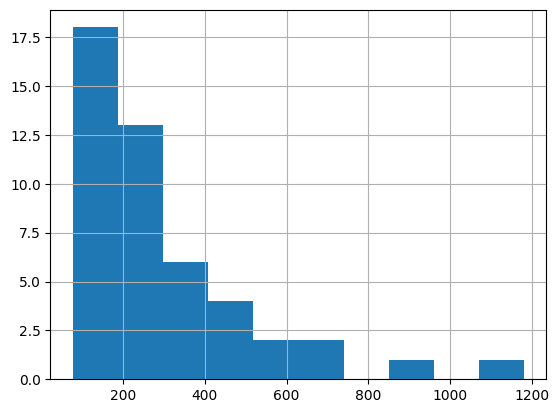

In [36]:
yado["ken_cd"].value_counts().hist()

In [28]:
yado.groupby("ken_cd")["lrg_cd"].nunique()

ken_cd
013592a15b9a689232792f11da797ac7     9
06a6febd7478c1aa664ed5ac87f2d560     7
072c85e1653e10c9c7dd065ad007125a     9
0745a2107686fcb724892ce52f19d02e     5
0a66f6ab9c0507059da6f22a0e1f1690    15
107c7305a74c8dcc4f143de208bf7ec2    13
21a8fca457386861964bea1ffa848fdd     6
223938a74a609968141867c244086206     8
2b99151dba9558109a35c75a3c05c38b     6
31a0f630d36db568ab23c9c1cd80d1c1     6
3831f43bb997a3028669c251c2c2f552     3
39c3eb151762dd35cf50e8bde404ae74     3
3acaaea4dab8892b5c9832f1b32f9448     9
3b09a7ce9934c00fd266f9cf246308d1     4
470fa9ac04f80c7e13db398668e124bf     3
517061b8165aa6370d9025951a64aa52     6
543ea7c443fdfd779bbd557f2ad99d80     5
558ac1909f0318b82c621ab250329d6d     5
572d60f0f5212aacda515ebf81fb0a3a     8
6692a692f80687411022c08e4f5a7a00     6
66c4d01ad8e30155582cf80b1d655986     5
689cf8289e7ea0b2eef1b017dcdfe8de     6
6920865be128aa14814810654738b159    14
6d279eafce12f1a118fe7cbaa74f105a     3
75617bb07a2785a948ab1958909211f1     3
7bc5fba93082f02f1c

count    12973.000000
mean        87.854929
std        107.382317
min          0.000000
25%         21.000000
50%         52.000000
75%        120.000000
max       2384.000000
Name: total_room_cnt, dtype: float64

<Axes: >

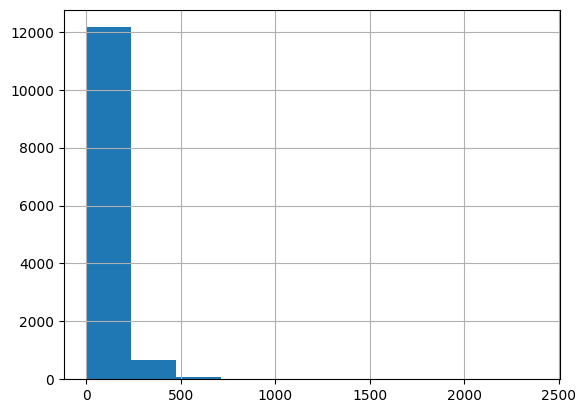

In [15]:
display(yado["total_room_cnt"].describe())
yado["total_room_cnt"].hist()

In [7]:
train.get_column("国").value_counts(sort=True)

国,counts
str,u32
"""日本""",4014
null,2277
"""中国""",350
"""朝鮮""",34
"""中国・日本""",9
"""西洋""",8
"""イギリス""",3
"""オランダ""",2
"""ヴェトナム""",2


In [8]:
# データの整備を行う
train.get_column("時代").value_counts(sort=True)

時代,counts
str,u32
"""鎌倉""",1319
"""平安""",1045
"""桃山""",345
"""明治""",336
"""江戸中期""",296
"""室町""",295
"""江戸前期""",283
"""南北朝""",282
"""江戸""",237


In [9]:
train.get_column("保管施設の名称").value_counts(sort=True)

保管施設の名称,counts
str,u32
null,5062
"""東京国立博物館""",358
"""京都国立博物館""",146
"""奈良国立博物館""",63
"""天理大学附属天理図書館""",37
"""公益財団法人静嘉堂""",35
"""財団法人エム・オー・エー美術…",34
"""公益財団法人五島美術館""",32
"""国立歴史民俗博物館""",32


In [10]:
train.get_column("所有者名").value_counts(sort=True)

所有者名,counts
str,u32
null,523
"""独立行政法人国立文化財機構""",455
"""個人""",171
"""国（文化庁）""",97
"""法隆寺""",76
"""東大寺""",63
"""国(文部科学省)""",62
"""大山祇神社""",46
"""公益財団法人静嘉堂""",42


In [11]:
train.get_column("管理団体又は責任者").value_counts(sort=True)

管理団体又は責任者,counts
str,u32
null,6352
"""財団法人高野山文化財保存会""",94
"""姫路市""",41
"""鎌倉市""",25
"""岡山県""",15
"""宗教法人東福寺""",13
"""宗教法人相国寺""",11
"""宗教法人延暦寺""",10
"""宗教法人中尊寺""",9


In [12]:
train.get_column("時代").value_counts(sort=True)

時代,counts
str,u32
"""鎌倉""",1319
"""平安""",1045
"""桃山""",345
"""明治""",336
"""江戸中期""",296
"""室町""",295
"""江戸前期""",283
"""南北朝""",282
"""江戸""",237


In [13]:
test.get_column("時代").value_counts(sort=True)

時代,counts
str,u32
"""鎌倉""",2044
"""平安""",1625
"""明治""",520
"""桃山""",514
"""室町""",445
"""江戸前期""",427
"""南北朝""",407
"""江戸中期""",394
"""江戸""",388


In [15]:
train.get_column("所在地").value_counts(sort=True)

所在地,counts
str,u32
null,2832
"""東京国立博物館 東京都台東区…",322
"""京都国立博物館 京都府京都市…",107
"""奈良国立博物館 奈良県奈良市…",48
"""栃木県日光市山内""",43
"""兵庫県姫路市本町""",41
"""東京都世田谷区上野毛3-9-…",39
"""天理大学附属天理図書館 奈良…",38
"""東京都港区南青山6-5-1""",37
